In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('cost-of-living_v2 copy.csv')

# Display the first few rows of the dataset
data.head()


,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1


In [4]:
# Checking for missing values
missing_values = data.isnull().sum()
missing_values

city               0
country            0
x1               428
x2               451
x3               334
x4               496
x5               440
x6               344
x7               445
x8               316
x9               378
x10              413
x11              343
x12              507
x13              478
x14              558
x15              566
x16              372
x17              381
x18              441
x19              469
x20              437
x21              433
x22              501
x23              388
x24              462
x25              721
x26              655
x27              490
x28             1506
x29             2166
x30              873
x31             1022
x32             1396
x33              588
x34             1058
x35              995
x36              488
x37             1201
x38              349
x39             1375
x40             2400
x41              475
x42             1132
x43             1681
x44              479
x45              617
x46          

In [5]:
# Summary statistics for numercical columns
summary_stats = data.describe()
summary_stats

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
count,4528.000000,4505.000000,4622.000000,4460.000000,4516.000000,4612.000000,4511.000000,4640.000000,4578.000000,4543.000000,...,4403.000000,3593.000000,3525.000000,3476.000000,3444.000000,2729.000000,2653.000000,3524.000000,3950.000000,4956.000000
mean,10.346705,43.357811,6.929697,3.379774,3.942465,2.754952,1.523873,1.119804,1.148554,1.612855,...,85.976357,711.574943,560.159957,1253.982914,974.082854,3235.270854,2341.933102,1821.186305,6.518030,0.186239
std,7.157058,25.528312,2.704435,2.105957,2.100146,1.358821,0.907025,0.755257,0.517186,1.089164,...,40.434524,648.869301,527.492342,1219.395297,921.331271,6258.792897,3570.623878,1631.465580,5.413828,0.389339
min,0.450000,3.250000,1.080000,0.330000,0.310000,0.220000,0.110000,0.070000,0.260000,0.050000,...,7.600000,21.700000,12.200000,61.510000,27.120000,111.010000,49.240000,18.000000,0.780000,0.000000
25%,4.310000,22.440000,4.980000,1.600000,2.200000,1.580000,0.770000,0.480000,0.830000,0.780000,...,58.430000,256.240000,171.050000,465.200000,325.710000,1120.110000,790.310000,478.980000,3.000000,0.000000
50%,9.600000,40.000000,6.990000,3.000000,3.690000,2.630000,1.480000,1.050000,1.045000,1.320000,...,84.260000,526.870000,403.940000,921.075000,712.830000,2107.490000,1580.620000,1290.840000,5.200000,0.000000
75%,15.000000,60.000000,8.500000,5.000000,5.270000,3.770000,2.110000,1.580000,1.320000,2.200000,...,106.770000,992.610000,790.310000,1710.225000,1369.870000,3843.380000,2798.250000,2770.855000,8.330000,0.000000
max,57.140000,213.690000,22.130000,20.600000,17.500000,10.000000,8.000000,5.850000,6.810000,8.820000,...,542.740000,12608.830000,8989.370000,27397.380000,17868.180000,240963.670000,80321.220000,12821.400000,61.330000,1.000000


In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = (missing_values / len(data)) * 100

# Columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index

# Drop the columns with significant missing values
data_cleaned = data.drop(columns=columns_to_drop)

# Impute the remaining missing values with median
for column in data_cleaned.columns:
    if data_cleaned[column].isnull().sum() > 0:
        median_value = data_cleaned[column].median()
        data_cleaned[column].fillna(median_value, inplace=True)

# Check if there are any remaining missing values
remaining_missing = data_cleaned.isnull().sum()

remaining_missing


city            0
country         0
x1              0
x2              0
x3              0
x4              0
x5              0
x6              0
x7              0
x8              0
x9              0
x10             0
x11             0
x12             0
x13             0
x14             0
x15             0
x16             0
x17             0
x18             0
x19             0
x20             0
x21             0
x22             0
x23             0
x24             0
x25             0
x26             0
x27             0
x28             0
x30             0
x31             0
x32             0
x33             0
x34             0
x35             0
x36             0
x37             0
x38             0
x39             0
x41             0
x42             0
x43             0
x44             0
x45             0
x46             0
x47             0
x48             0
x49             0
x50             0
x51             0
x54             0
x55             0
data_quality    0
dtype: int64

In [8]:
# Remove duplicate rows
initial_row_count = len(data_cleaned)
data_cleaned = data_cleaned.drop_duplicates()

# Calculate the number of rows removed
rows_removed = initial_row_count - len(data_cleaned)

rows_removed


0

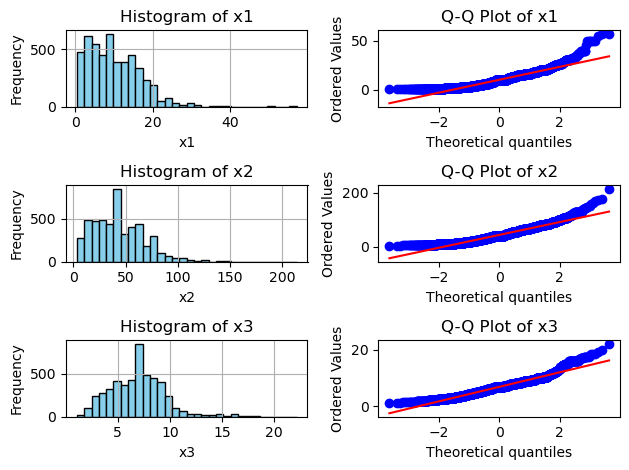

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
# Plot histograms and Q-Q plots for selected columns
selected_columns = ['x1', 'x2', 'x3']


for idx, column in enumerate(selected_columns, 1):
    # Histogram
    plt.subplot(3, 2, idx*2 - 1)
    data_cleaned[column].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Q-Q Plot
    plt.subplot(3, 2, idx*2)
    stats.probplot(data_cleaned[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')

plt.tight_layout()
plt.show()


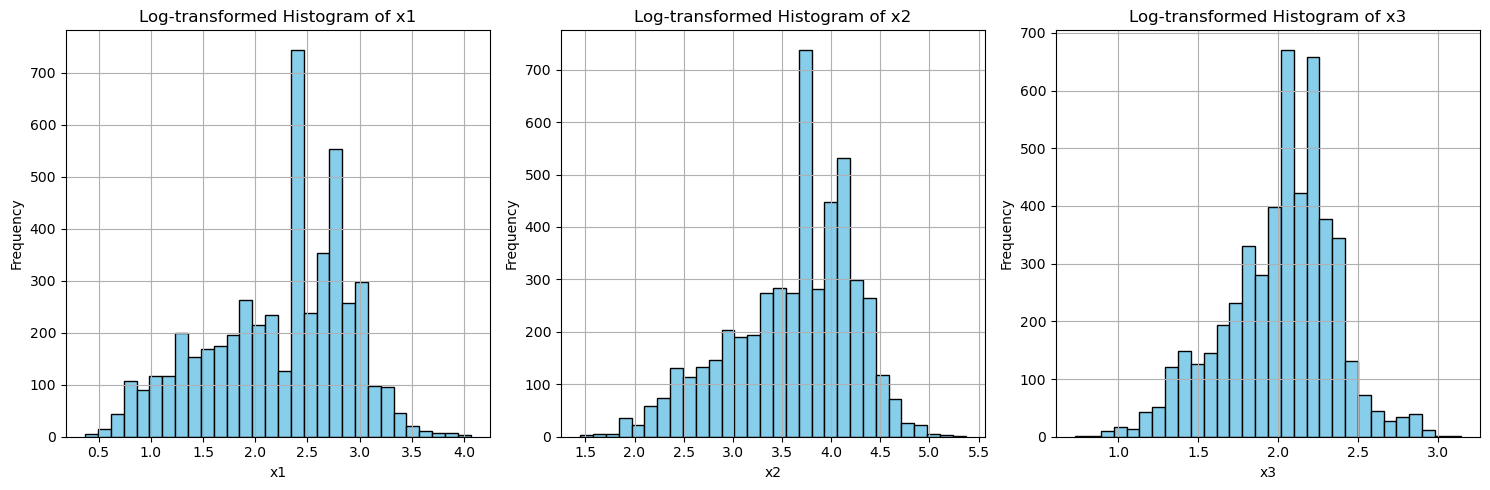

In [11]:
#
import numpy as np

# Apply log transformation to the selected columns
data_transformed = data_cleaned.copy()
for column in selected_columns:
    data_transformed[column] = np.log1p(data_transformed[column])  # Using log1p to also account for 0 values

# Plot histograms for the transformed data
plt.figure(figsize=(15, 5))

for idx, column in enumerate(selected_columns, 1):
    plt.subplot(1, 3, idx)
    data_transformed[column].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Log-transformed Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


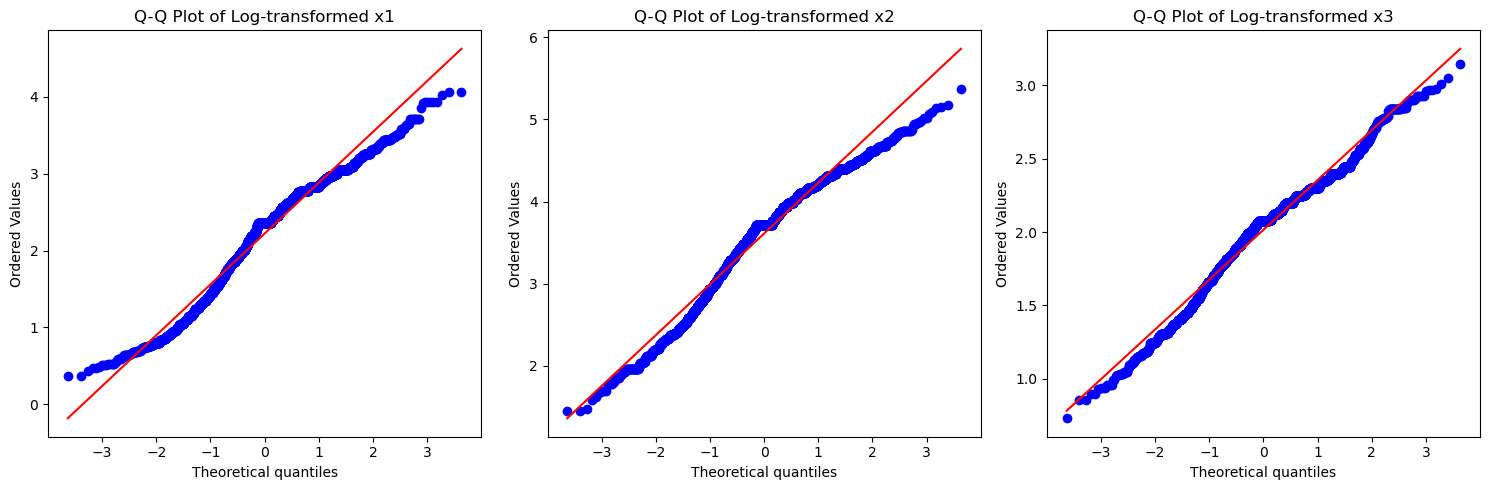

NameError: name 'sample_size' is not defined

In [12]:
# Plot Q-Q plots for the transformed data
plt.figure(figsize=(15, 5))

for idx, column in enumerate(selected_columns, 1):
    plt.subplot(1, 3, idx)
    stats.probplot(data_transformed[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Log-transformed {column}')

plt.tight_layout()
plt.show()



In [26]:
# Compute an average cost of living index for each country
data_cleaned['avg_cost'] = data_cleaned.iloc[:, 2:-1].mean(axis=1)

# Group by country and compute the mean of the average cost
country_avg_cost = data_cleaned.groupby('country')['avg_cost'].mean()

# Normalize against the most expensive country
normalized_ppp = country_avg_cost / country_avg_cost.max()

# Convert to DataFrame for export
normalized_ppp_df = normalized_ppp.reset_index()
normalized_ppp_df.columns = ['country', 'normalized_ppp']

normalized_ppp_df.sort_values('normalized_ppp', ascending=False).head(10)



,country,normalized_ppp
175,Solomon Islands,1.000000
171,Singapore,0.473550
46,Cuba,0.246221
22,Bermuda,0.230295
88,Iran,0.218165
125,Monaco,0.212580
117,Mali,0.197660
14,Bahamas,0.193225
83,Hong Kong,0.185658
92,Israel,0.179900
